# Check the error of central differencing and upwind differencing, for 1D constant advection equation

In [1]:
# Clear all the variables at the beginning
%reset -f

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import sys
import os
import importlib


# Get the parent directory of the current file
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)


import solvers
importlib.reload(solvers)
import utils
importlib.reload(utils)


<module 'utils' from 'd:\\PhD at UCLA\\Spring 2025\\MAE-250H\\utils.py'>

In [3]:
'''
Define the experimental parameters
'''
# Define the domain
a = 0
b = 1


# Define the mesh grid
N = 2048
x_grid = np.linspace(a, b, N+1)
dx = x_grid[1] - x_grid[0]

# Define the advection speed
c = 1

# Define the (largest) time step used in the simulation
dt = dx / 2

# Define the total time
T = 0.4

In [4]:
print("dt is ", dt)

dt is  0.000244140625


In [5]:
'''
Initial condition
'''

def initial_condition(x):
    u_initial = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] <= 0.4 and x[i] >= 0.2:
            u_initial[i] = 1
        else:
            u_initial[i] = 0
    return u_initial

# Central difference experiment

In [6]:
u_results = []
x_grids = []
L2_errors = []

experiment_num = 5

In [7]:
for i in range(experiment_num):
    print("This is iteration " + str(i+1))
    central_difference_solver = solvers.transport_solver(a, b, dt / (2**i), dx, initial_condition, c, T, discretization_method="central")
    u_results.append(central_difference_solver.solve())
    x_grids.append(central_difference_solver.get_x_grid())


This is iteration 1
dt is 0.000244140625
dx is 0.00048828125
This is iteration 2
dt is 0.0001220703125
dx is 0.00048828125
This is iteration 3
dt is 6.103515625e-05
dx is 0.00048828125
This is iteration 4
dt is 3.0517578125e-05
dx is 0.00048828125
This is iteration 5
dt is 1.52587890625e-05
dx is 0.00048828125


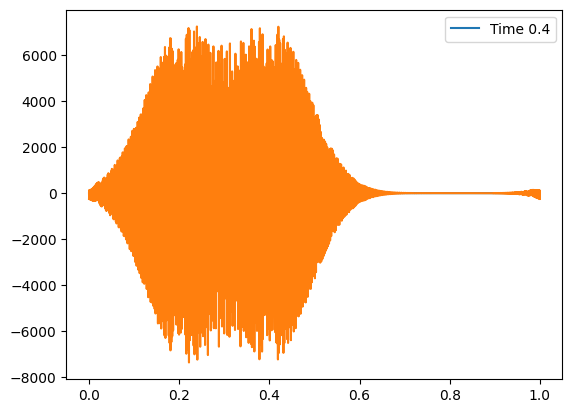

In [8]:
idx_testing = -1
central_difference_solver.visualize(idx_testing)

central difference error verification

In [9]:
for i in range(experiment_num):
    exact_solution = initial_condition(x_grids[i]-T*c)
    dx = x_grids[i][1] - x_grids[i][0]
    error = dx * np.linalg.norm(u_results[i] - exact_solution)
    L2_errors.append(error)

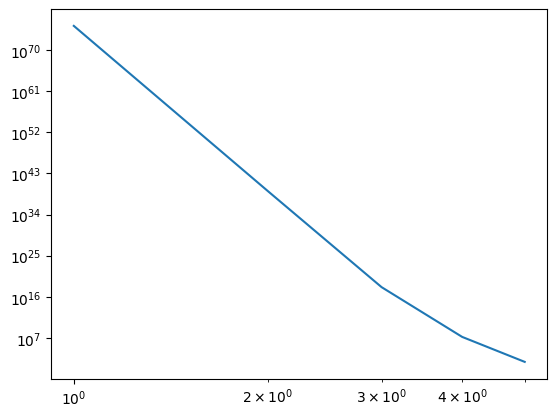

In [10]:
plt.loglog(np.linspace(1, experiment_num, experiment_num), L2_errors)
# plt.plot(np.linspace(1, experiment_num, experiment_num), L2_errors)
plt.show()


# Upwind difference experiment

In [11]:
u_results = []
x_grids = []
L2_errors = []

experiment_num = 5

In [12]:
for i in range(experiment_num):
    print("This is iteration " + str(i+1))
    upwind_solver = solvers.transport_solver(a, b, dt / (2**i), dx, initial_condition, c, T, discretization_method="upwind")
    u_results.append(upwind_solver.solve())
    x_grids.append(upwind_solver.get_x_grid())


This is iteration 1
dt is 0.000244140625
dx is 0.00048828125
This is iteration 2
dt is 0.0001220703125
dx is 0.00048828125
This is iteration 3
dt is 6.103515625e-05
dx is 0.00048828125
This is iteration 4
dt is 3.0517578125e-05
dx is 0.00048828125
This is iteration 5
dt is 1.52587890625e-05
dx is 0.00048828125


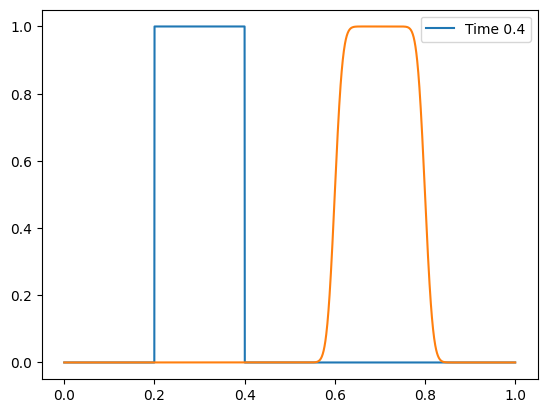

In [17]:
idx_testing = -1
upwind_solver.visualize(idx_testing)

upwind scheme error verification

In [14]:
for i in range(experiment_num):
    exact_solution = initial_condition(x_grids[i]-T*c)
    dx = x_grids[i][1] - x_grids[i][0]
    error = dx * np.linalg.norm(u_results[i] - exact_solution)
    L2_errors.append(error)

<!-- DSAFA -->

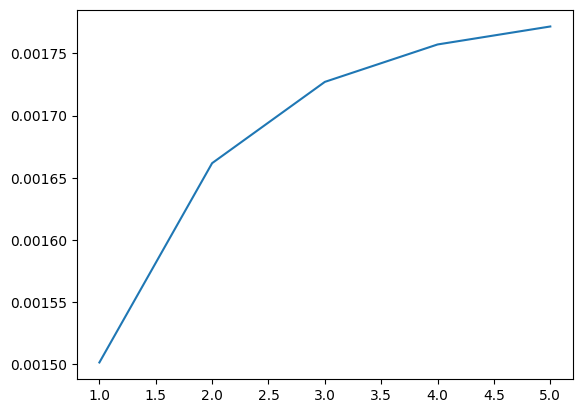

In [15]:
# plt.loglog(np.linspace(1, experiment_num, experiment_num), L2_errors)
plt.plot(np.linspace(1, experiment_num, experiment_num), L2_errors)
plt.show()

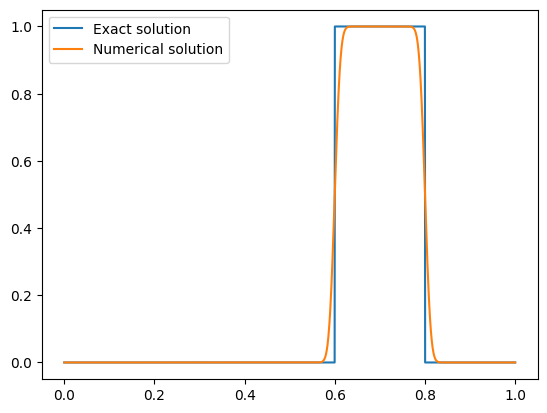

In [16]:
idx_plotting = 0

exact_solution = initial_condition(x_grids[idx_plotting]-T*c)
plt.plot(x_grids[idx_plotting], exact_solution)
plt.plot(x_grids[idx_plotting], u_results[idx_plotting])
plt.legend(['Exact solution', 'Numerical solution'])
plt.show()
